In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
pd.DataFrame(df['cast'].value_counts().sort_values(ascending=False))

,cast
David Attenborough,19
"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",14
Samuel West,10
Jeff Dunham,7
"David Spade, London Hughes, Fortune Feimster",6
...,...
"Patrick Davis, Lisa Vidal, Josh Pence, José Zúñiga, Haley Ramm, Matt Angel, J. Michael Trautmann, Lobo Sebastian",1
"Anna Demetriou, Timo Nieminen, Will Mellor, Andrew Whipp, Paul Freeman, Terence Stamp, Ian Beattie, Victoria Broom, Taylor Frost, Martyn Ford",1
"Emile Hirsch, Zoë Kravitz, Emory Cohen, Zoey Deutch, Beau Knapp, Jason Mitchell, Scott Mescudi, Jeff Gum, Joey Bicicchi",1
"Vidit Kumar, Roopa Bhimani, Anubhav Saha, Brian Dcosta",1


In [9]:
splitter=df['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [10]:
df_cast=pd.DataFrame(splitter, index=df['title'])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
df_cast=pd.DataFrame(df_cast.stack()).reset_index()

In [12]:
df_cast=df_cast[['title',0]]

In [13]:
df_cast.columns=['title','actor']
df_cast

,title,actor
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [36]:
df_new=df.merge(df_cast, on='title', how='inner')

In [37]:
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,nan
1,s2,TV Show,Blood & Water,No director specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Ama Qamata
2,s2,TV Show,Blood & Water,No director specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Khosi Ngema
3,s2,TV Show,Blood & Water,No director specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Gail Mabalane
4,s2,TV Show,Blood & Water,No director specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Manish Chaudhary
64947,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Meghna Malik
64948,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Malkeet Rauni
64949,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Anita Shabdish


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [16]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [17]:
df['release_year'] = df['release_year'].fillna(df['release_year'].mode()[0])

In [18]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [19]:
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

In [20]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [21]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [22]:
rating_dict = df['rating'].value_counts().to_dict()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_7568\3765000619.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=30)


[Text(0, 0, 'TV-MA'),
 Text(1, 0, 'TV-14'),
 Text(2, 0, 'TV-PG'),
 Text(3, 0, 'R'),
 Text(4, 0, 'PG-13'),
 Text(5, 0, 'TV-Y7'),
 Text(6, 0, 'TV-Y'),
 Text(7, 0, 'PG'),
 Text(8, 0, 'TV-G'),
 Text(9, 0, 'NR'),
 Text(10, 0, 'G'),
 Text(11, 0, 'TV-Y7-FV'),
 Text(12, 0, 'NC-17'),
 Text(13, 0, 'UR'),
 Text(14, 0, '74 min'),
 Text(15, 0, '84 min'),
 Text(16, 0, '66 min')]

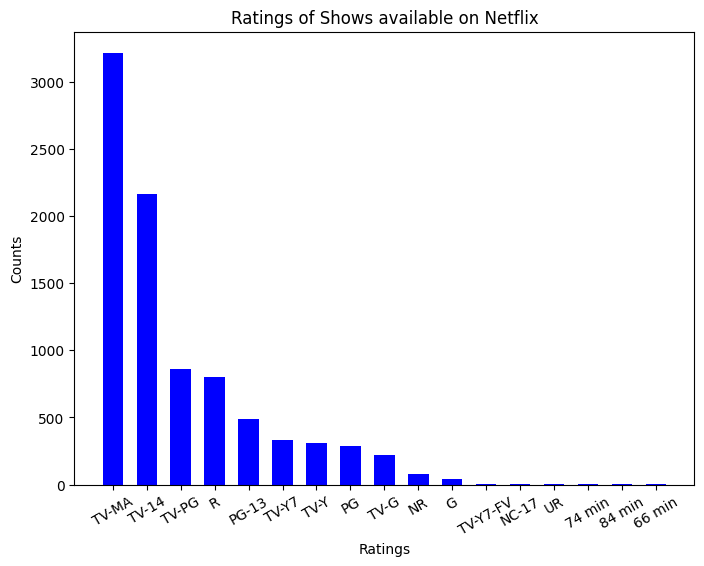

In [23]:
x = [i for i in rating_dict]
y =[ rating_dict[i] for i in rating_dict ]

plt.figure(figsize=(8,6), dpi=100)

plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Ratings of Shows available on Netflix')
ax = plt.subplot()

plt.bar(x,y, color='b',width=0.6)
ax.set_xticklabels(x, rotation=30)

In [24]:
from collections import Counter
ratings = Counter(df['rating'])

In [25]:
ratings

Counter({'PG-13': 490,
         'TV-MA': 3211,
         'PG': 287,
         'TV-14': 2160,
         'TV-PG': 863,
         'TV-Y': 307,
         'TV-Y7': 334,
         'R': 799,
         'TV-G': 220,
         'G': 41,
         'NC-17': 3,
         '74 min': 1,
         '84 min': 1,
         '66 min': 1,
         'NR': 80,
         'TV-Y7-FV': 6,
         'UR': 3})

Text(0, 0.5, 'Total Count')

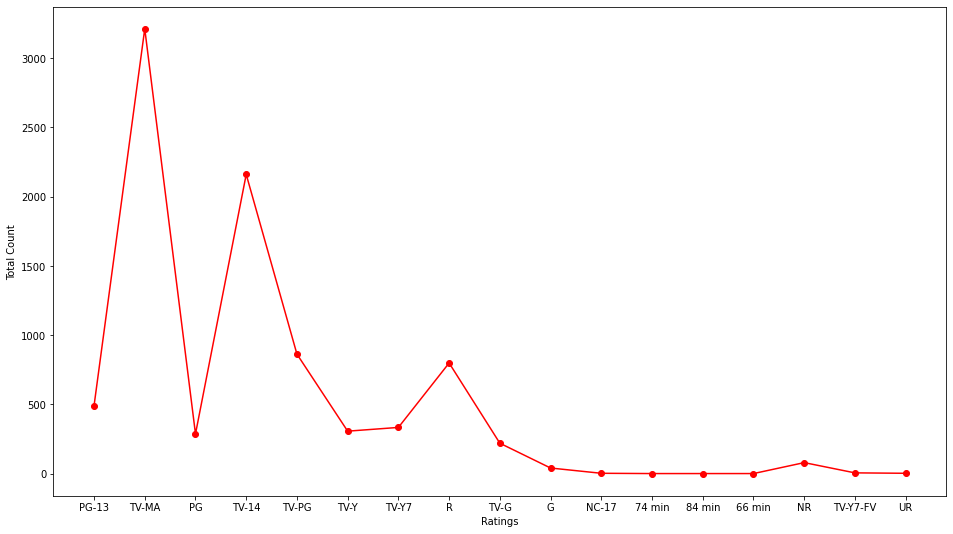

In [26]:
plt. figure(figsize=(16,9))
plt.plot(ratings.keys(), ratings.values(), color = 'red', marker='o') 
plt.xlabel('Ratings'); plt.ylabel('Total Count') 


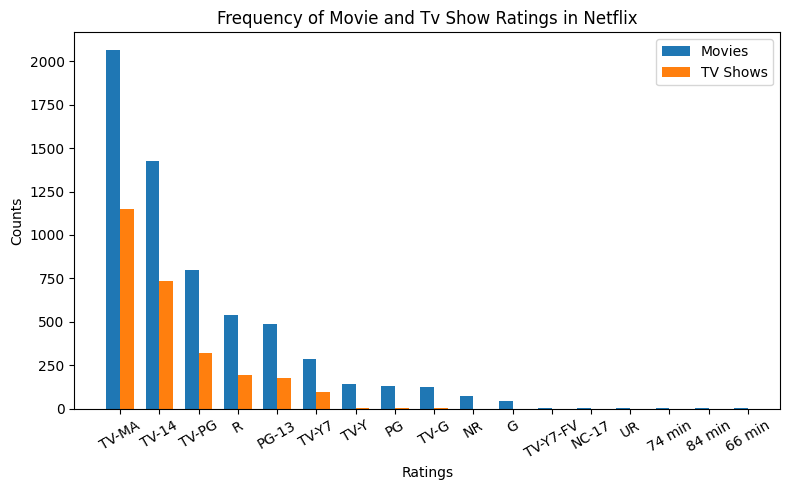

In [27]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

bwid = 0.35

x = [i for i in rating_dict]
my = [i for i in df.loc[ df['type'] == 'Movie' ]['rating'].value_counts()]

ax.bar(np.arange(len(x)) - bwid/2, my, bwid, label='Movies');

tx = [ i for i in df.loc[ df['type'] == 'TV Show' ]['rating'].value_counts().sort_values(ascending=False).index.unique()]
ty = [ i for i in df.loc[ df['type'] == 'TV Show' ]['rating'].value_counts()]

ax.bar(np.arange(len(tx)) + bwid/2, ty, bwid, label='TV Shows');

ax.set_title('Frequency of Movie and Tv Show Ratings in Netflix')
ax.set_xlabel('Ratings')
ax.set_ylabel('Counts')
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x,rotation=30);

ax.legend();
fig.tight_layout();

In [28]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

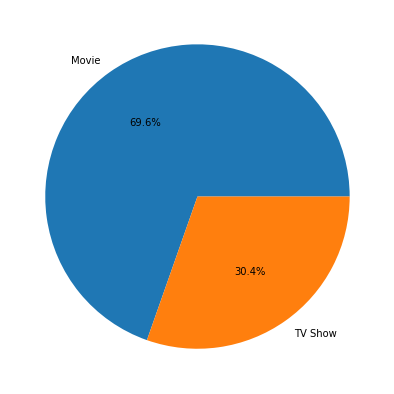

In [29]:
labels = df['type'].value_counts().keys()
size = df['type'].value_counts().values
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(size,labels=labels, autopct='%1.1f%%')
plt.show()

In [30]:
df['director'] = df['director'].fillna('No director specified')
filtered_directors = pd.DataFrame()
filtered_directors = df['director'].str.split(',', expand = True).stack()
filtered_directors = filtered_directors.to_frame()
filtered_directors.columns = ['Director']
directors = filtered_directors.groupby(['Director']).size().reset_index(name = 'Total_Content')
directors = directors[directors.Director != 'No director specified']
directors = directors.sort_values(by = ['Total_Content'], ascending = False)
directorsTop5 = directors.head()
directorsTop5 = directorsTop5.sort_values(by = ['Total_Content'])

In [31]:
filtered_directors

,,Director
0,0,Kirsten Johnson
1,0,No director specified
2,0,Julien Leclercq
3,0,No director specified
4,0,No director specified
...,...,...
8802,0,David Fincher
8803,0,No director specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [32]:
directorsTop5

,Director,Total_Content
4652,Suhas Kadav,16
3235,Marcus Raboy,16
4068,Raúl Campos,18
261,Jan Suter,18
4021,Rajiv Chilaka,22


In [33]:
director_data = directorsTop5['Director'].tolist()
director_data.reverse()
director_data

['Rajiv Chilaka', ' Jan Suter', 'Raúl Campos', 'Marcus Raboy', 'Suhas Kadav']

In [34]:
total_content = directorsTop5['Total_Content'].tolist()
total_content.reverse()
total_content

[22, 18, 18, 16, 16]

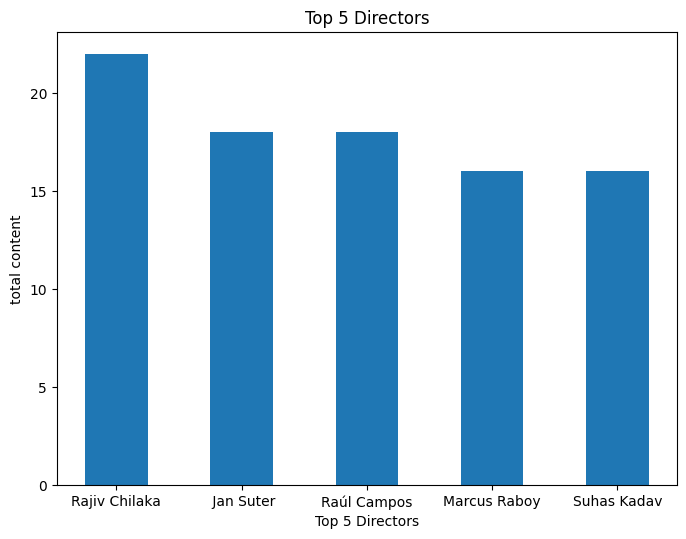

In [35]:
plt.figure(figsize=(8,6), dpi=100)
plt.bar(director_data, total_content,width = 0.5)
plt.xlabel("Top 5 Directors")
plt.ylabel("total content")
plt.title("Top 5 Directors")
plt.show()

In [45]:
df_new['actor'] = df_new['actor'].fillna('No cast specified')
filtered_cast = pd.DataFrame()
filtered_cast = df_new['actor'].str.split(',', expand = True).stack()
filtered_cast = filtered_cast.to_frame()
filtered_cast.columns = ['Actor']
actors = filtered_cast.groupby(['Actor']).size().reset_index(name = 'Total_Content_actor')
actors = actors[actors.Actor != 'nan']
actors = actors.sort_values(by = ['Total_Content_actor'], ascending = False)
actorsTop5 = actors.head()
actorsTop5 = actorsTop5.sort_values(by = ['Total_Content_actor'],ascending=False)

In [46]:
actorsTop5

,Actor,Total_Content_actor
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32


In [47]:
actor_data = actorsTop5['Actor'].tolist()
actor_data

['Anupam Kher',
 'Shah Rukh Khan',
 'Julie Tejwani',
 'Naseeruddin Shah',
 'Takahiro Sakurai']

In [48]:
Total_content_actor=actorsTop5['Total_Content_actor'].tolist()
Total_content_actor

[43, 35, 33, 32, 32]

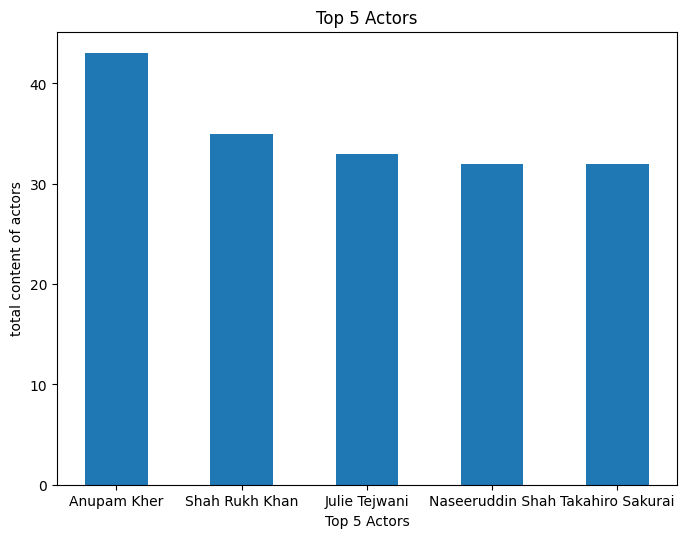

In [49]:
plt.figure(figsize=(8,6), dpi=100)
plt.bar(actor_data, Total_content_actor,width = 0.5)
plt.xlabel("Top 5 Actors")
plt.ylabel("total content of actors")
plt.title("Top 5 Actors")
plt.show()

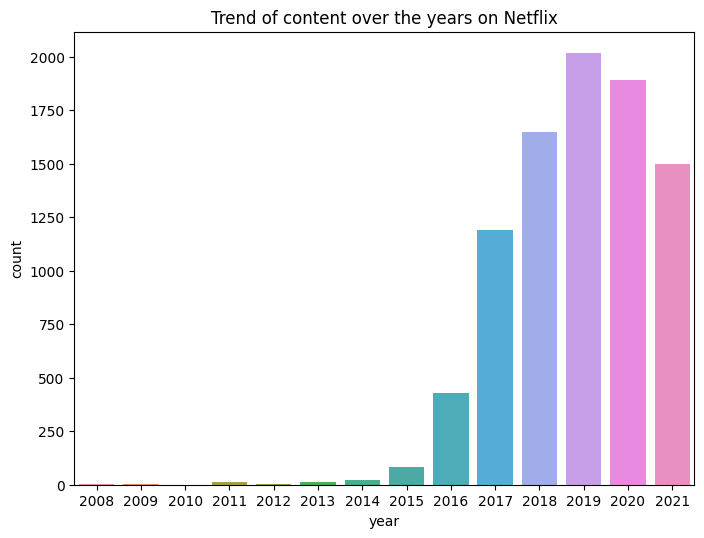

In [50]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(x=df["year"])
plt.title("Trend of content over the years on Netflix")
plt.show()

<Figure size 800x600 with 0 Axes>

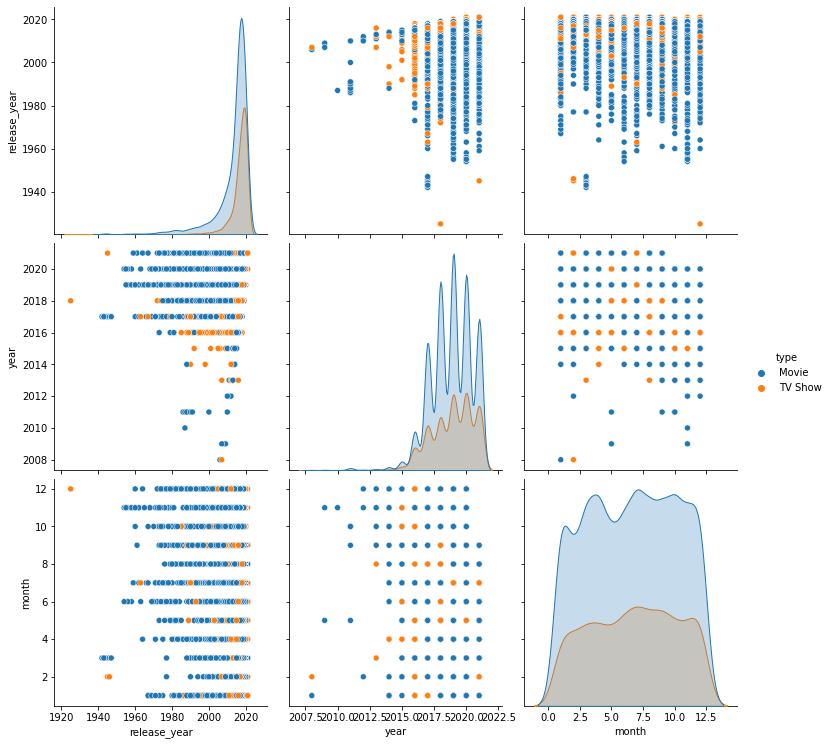

<Figure size 800x600 with 0 Axes>

In [160]:
sns.pairplot(df, hue ="type",height=3.5)
plt.figure(figsize=(8,6), dpi=100)

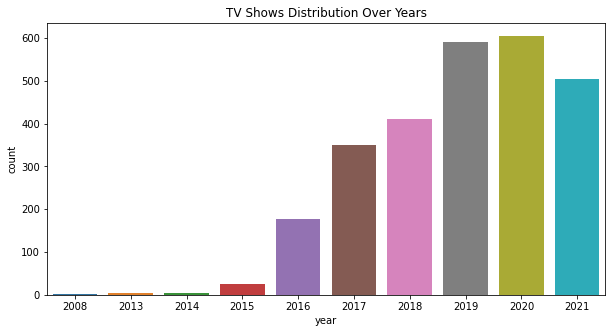

In [51]:
tv_show_data = df[df['type']=="TV Show"]
plt.figure(figsize=(10,5))
sns.countplot(x=tv_show_data["year"])
plt.title("TV Shows Distribution Over Years")
plt.show()

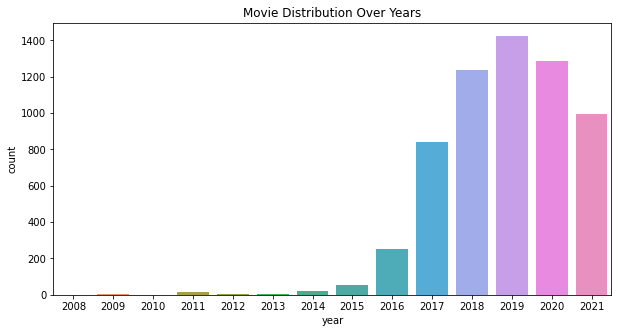

In [52]:
movie_data = df[df['type']=="Movie"]
plt.figure(figsize=(10,5))
sns.countplot(x=movie_data["year"])
plt.title("Movie Distribution Over Years")
plt.show()

In [53]:
country_data = df['country'].value_counts()

In [54]:
top_10 = dict(country_data[:10])
top_10

{'United States': 3649,
 'India': 972,
 'United Kingdom': 419,
 'Japan': 245,
 'South Korea': 199,
 'Canada': 181,
 'Spain': 145,
 'France': 124,
 'Mexico': 110,
 'Egypt': 106}

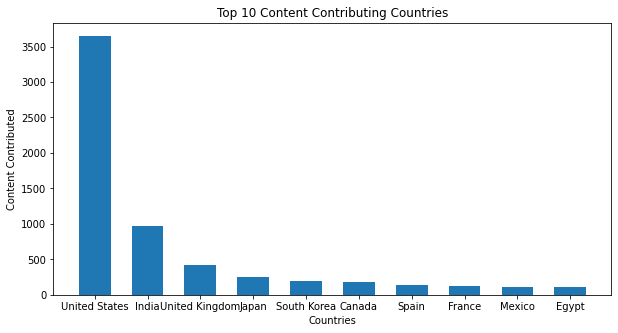

In [55]:
fig = plt.figure(figsize = (10, 5))
plt.bar(top_10.keys(), top_10.values(),width = 0.6)
plt.xlabel("Countries")
plt.ylabel("Content Contributed")
plt.title("Top 10 Content Contributing Countries")
plt.show()

In [57]:
tv_show_data = df[df['type']=="TV Show"]

In [58]:
tv_show_data = tv_show_data['country'].value_counts()
tv_top5 = tv_show_data[:5]
tv_top5 = dict(tv_top5)

In [59]:
tv_top5

{'United States': 1151,
 'United Kingdom': 213,
 'Japan': 169,
 'South Korea': 158,
 'India': 79}

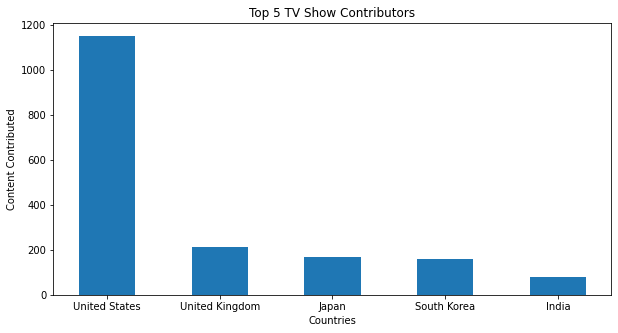

In [60]:
fig = plt.figure(figsize = (10, 5))
plt.bar(tv_top5.keys(), tv_top5.values(),width = 0.5)
plt.xlabel("Countries")
plt.ylabel("Content Contributed")
plt.title("Top 5 TV Show Contributors")
plt.show()

In [61]:
movie_data = df[df['type']=="Movie"]

In [62]:
movie_data = movie_data['country'].value_counts()
movie_top5 = movie_data[:5]
movie_top5 = dict(movie_top5)

In [63]:
movie_top5

{'United States': 2498,
 'India': 893,
 'United Kingdom': 206,
 'Canada': 122,
 'Spain': 97}

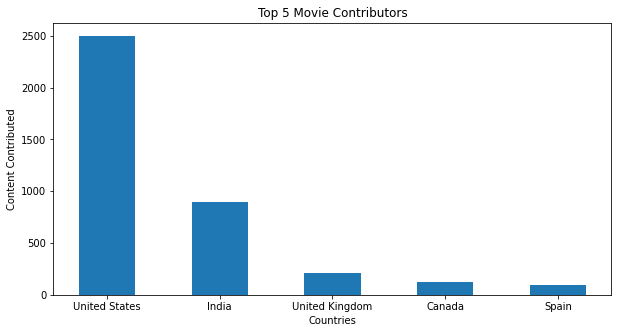

In [64]:
fig = plt.figure(figsize = (10, 5))
plt.bar(movie_top5.keys(), movie_top5.values(),width = 0.5)
plt.xlabel("Countries")
plt.ylabel("Content Contributed")
plt.title("Top 5 Movie Contributors")
plt.show()